### Gagan Makhiza
### MSc Data Science and Analytics
### CS6421 Final Project: Deep Learning

By submitting this exam, I declare

(1) that all work of it is my own;

(2) that I did not seek whole or partial solutions for any part of my submission from others; and

(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  #The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc3
Is Executing Eagerly? True


# Tasks for Basic Autoencoder Assignment







## Dense Architecture Given



In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    mse = epoch_loss/256
    print('Epoch {}/{}. Loss: {}  MSE: {}'.format(epoch + 1, epochs, epoch_loss.numpy(), mse))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.658407211303711  MSE: 0.03772815316915512
Epoch 2/100. Loss: 6.132307529449463  MSE: 0.023954326286911964
Epoch 3/100. Loss: 5.5563483238220215  MSE: 0.02170448563992977
Epoch 4/100. Loss: 5.255572319030762  MSE: 0.020529579371213913
Epoch 5/100. Loss: 5.071281433105469  MSE: 0.019809693098068237
Epoch 6/100. Loss: 4.971800804138184  MSE: 0.01942109689116478
Epoch 7/100. Loss: 4.863777160644531  MSE: 0.0189991295337677
Epoch 8/100. Loss: 4.82266902923584  MSE: 0.0188385508954525
Epoch 9/100. Loss: 4.8022379875183105  MSE: 0.0187587421387434
Epoch 10/100. Loss: 4.775545597076416  MSE: 0.01865447498857975
Epoch 11/100. Loss: 4.773087024688721  MSE: 0.018644871190190315
Epoch 12/100. Loss: 4.7334303855896  MSE: 0.018489962443709373
Epoch 13/100. Loss: 4.716141223907471  MSE: 0.018422426655888557
Epoch 14/100. Loss: 4.707061767578125  MSE: 0.01838696002960205
Epoch 15/100. Loss: 4.689007759094238  MSE: 0.01831643655896187
Epoch 16/100. Loss: 4.679468154907227  MSE: 0.0

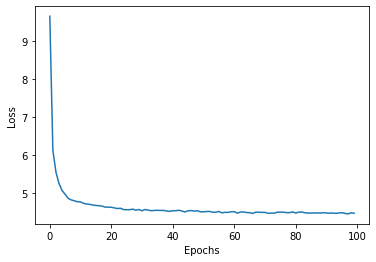

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

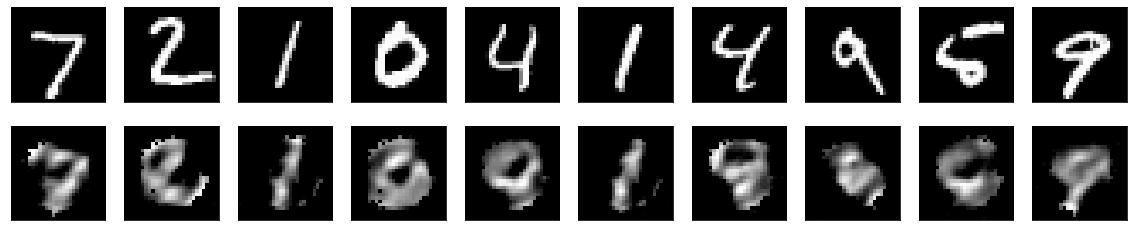

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dense Architecture 1

I have calculated the MSE by dividing the epoch_loss by batch size and passed it into print to show it in output.

Changes done for Dense Architecture 1 compared to given architecture

1. Hidden_layer number of neurons changed to 512
2. output_layer number of neurons changed to 256
3. learning rate changed to 0.001
4. Number of epochs = 100

Adding more neuron to layers makes the network extract more features and learn complex functions. Decreasing learning rate make the network to take small step in updating weights and reach to optimum weights. By making the above mention changes the loss decreases to 0.861119 after 100 epochs.



In [0]:
class MyEncoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(MyEncoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim["h1_dim"], activation=tf.nn.relu) 
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim["h2_dim"], activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class MyDecoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(MyDecoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim["h1_dim"], activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu) 
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)


In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = MyEncoder1(intermediate_dim=intermediate_dim)
    self.decoder = MyDecoder1(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

In [0]:
intermediate_dim = {"h1_dim": 512, "h2_dim": 256}
model = Autoencoder(intermediate_dim=intermediate_dim, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 4.782667636871338  MSE: 0.018682295456528664
Epoch 2/100. Loss: 1.8608001470565796  MSE: 0.007268750574439764
Epoch 3/100. Loss: 1.5164549350738525  MSE: 0.0059236520901322365
Epoch 4/100. Loss: 1.3421902656555176  MSE: 0.0052429307252168655
Epoch 5/100. Loss: 1.2436734437942505  MSE: 0.004858099389821291
Epoch 6/100. Loss: 1.1863585710525513  MSE: 0.004634213168174028
Epoch 7/100. Loss: 1.1101990938186646  MSE: 0.004336715210229158
Epoch 8/100. Loss: 1.088684320449829  MSE: 0.004252673126757145
Epoch 9/100. Loss: 1.0323659181594849  MSE: 0.004032679367810488
Epoch 10/100. Loss: 1.0087146759033203  MSE: 0.003940291702747345
Epoch 11/100. Loss: 0.9895320534706116  MSE: 0.0038653595838695765
Epoch 12/100. Loss: 0.9758812785148621  MSE: 0.00381203624419868
Epoch 13/100. Loss: 0.9640594720840454  MSE: 0.0037658573128283024
Epoch 14/100. Loss: 0.9761683940887451  MSE: 0.0038131577894091606
Epoch 15/100. Loss: 0.9407466650009155  MSE: 0.0036747916601598263
Epoch 16/100. Lo

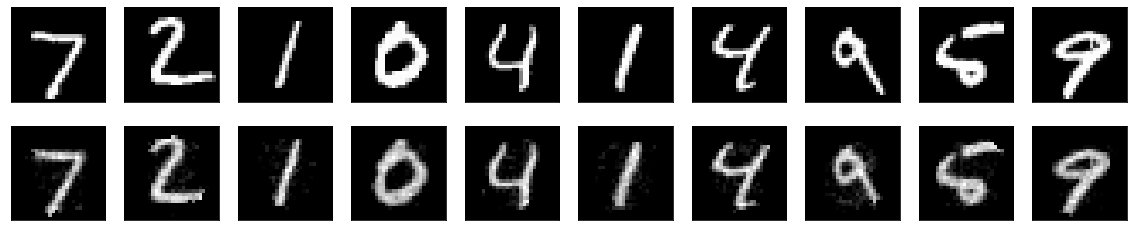

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

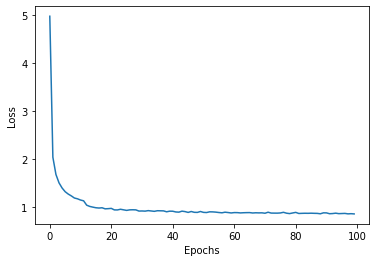

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Dense Architecture 2

Changes done for Dense Architecture 2 compared to given architecture

1. Hidden_layer number of neurons changed to 512
2. Hidden_layer2 added with 256 neurons
3. output_layer number of neurons changed to 256
4. learning rate changed to 0.001

Added another hidden layer and more neurons to the network to reduce loss to 0.36700 on 100 epochs.

In [0]:
class MyEncoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(MyEncoder2, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim["h1_dim"], activation=tf.nn.relu) 
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim["h2_dim"], activation= tf.nn.relu) 
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim["out_dim"], activation=tf.nn.relu) 
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features) 
        activation = self.hidden_layer2(activation) 
        return self.output_layer(activation) 

class MyDecoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(MyDecoder2, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim["h2_dim"], activation=tf.nn.relu) 
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim["h1_dim"], activation= tf.nn.relu) 
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid) 
  
    def call(self, code):
        activation = self.hidden_layer(code) 
        activation = self.hidden_layer2(activation) 
        return self.output_layer(activation) 

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = MyEncoder2(intermediate_dim=intermediate_dim)
    self.decoder = MyDecoder2(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(264)
intermediate_dim = {"h1_dim": 512, "h2_dim": 256, "out_dim": 256}
model = Autoencoder(intermediate_dim, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.479446411132812  MSE: 0.04093533754348755
Epoch 2/100. Loss: 3.603745698928833  MSE: 0.014077131636440754
Epoch 3/100. Loss: 2.5334227085113525  MSE: 0.00989618245512247
Epoch 4/100. Loss: 2.0528814792633057  MSE: 0.008019068278372288
Epoch 5/100. Loss: 1.7925411462783813  MSE: 0.007002113852649927
Epoch 6/100. Loss: 1.5878922939300537  MSE: 0.006202704273164272
Epoch 7/100. Loss: 1.4475177526474  MSE: 0.005654366221278906
Epoch 8/100. Loss: 1.3324635028839111  MSE: 0.005204935558140278
Epoch 9/100. Loss: 1.2515453100204468  MSE: 0.00488884886726737
Epoch 10/100. Loss: 1.1675673723220825  MSE: 0.004560810048133135
Epoch 11/100. Loss: 1.1141701936721802  MSE: 0.004352227319031954
Epoch 12/100. Loss: 1.1259443759918213  MSE: 0.004398220218718052
Epoch 13/100. Loss: 1.0188689231872559  MSE: 0.003979956731200218
Epoch 14/100. Loss: 0.9517924785614014  MSE: 0.003717939369380474
Epoch 15/100. Loss: 0.920332133769989  MSE: 0.0035950473975390196
Epoch 16/100. Loss: 0.8869

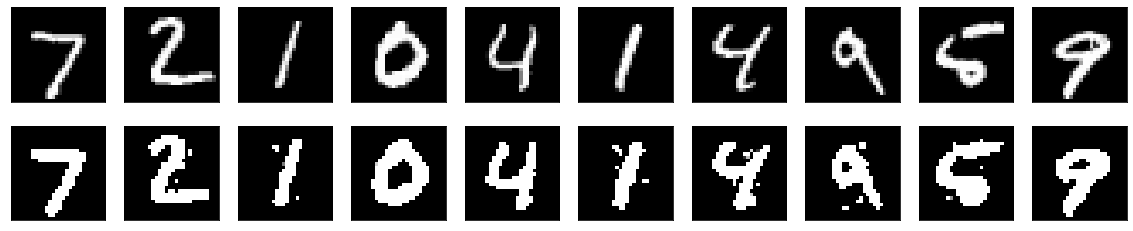

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN Architecture Given

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
# to train this model we will with original MNIST digits with shape 
# (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, 
                epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4745 - val_loss: 0.4751
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4671 - val_loss: 0.4671
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4587 - val_loss: 0.4579
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4493 - val_loss: 0.4481
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4392 - val_loss: 0.4372
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4275 - val_loss: 0.4240
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4130 - val_loss: 0.4074
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3950 - val_loss: 0.3873
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3740 - val_loss: 0.3647
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3515 - val_lo

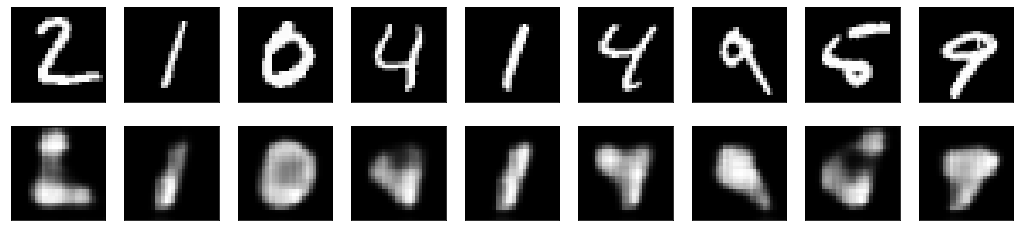

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN Architecture 1

Changes done for CNN Architecture 1 compared to CNN architecture given

* Reduced the Conv2D layers to 2 with 20 and 10 numbers of filter.
* Number of epochs = 100
* changed learning_rate = 0.0001 with optimizer Adam

Increased number of filters will help the network to make more progress in detecting edges also changed learning rate help in optimizization.

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(20, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = x

x = tf.keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(20, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy')

In [0]:
# to train this model we will with original MNIST digits with shape 
# (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, 
                epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3901 - val_loss: 0.1759
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1395 - val_loss: 0.1188
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1098 - val_loss: 0.1014
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0985 - val_loss: 0.0938
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0926 - val_loss: 0.0892
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0887 - val_loss: 0.0861
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0860 - val_loss: 0.0838
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0840 - val_loss: 0.0821
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0825 - val_loss: 0.0808
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0813 - val_lo

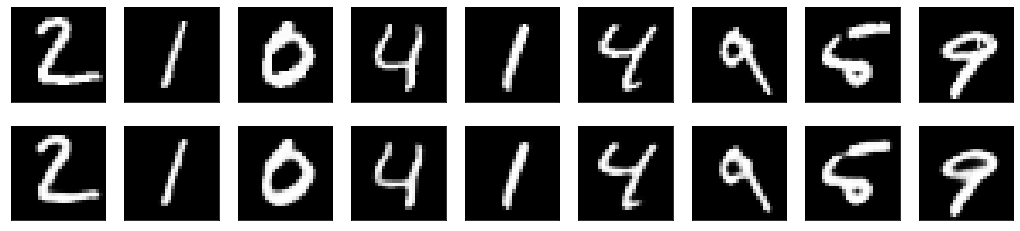

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Comparsion of different architecture
> Dense architecture is using MSE as loss while CNN is using binary_crossentropy so we cannot compare these architecture based on losses. However by visually looking at the output produced by all network CNN architecture seems to do be doing a better job for basic autoencoder task.



# Tasks for denoising Autoencoder

## Denoising autoencoder





In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# CHANGE DONE : changed to float 32
x_train_noisy_flat = x_train_noisy.astype(np.float32)
x_test_noisy_flat = x_test_noisy.astype(np.float32)
x_train_noisy_flat = np.reshape(x_train_noisy_flat, (x_train_noisy_flat.shape[0], 784))
x_test_noisy_flat = np.reshape(x_test_noisy_flat, (x_test_noisy_flat.shape[0], 784))


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


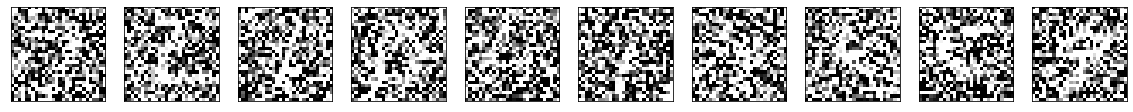

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN Denoising autoencoder

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(input_img)
x = tf.keras.layers.LeakyReLU(alpha = 0.1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.LeakyReLU(alpha = 0.1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2),  padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.LeakyReLU(alpha = 0.1)(x)
encoded = x

x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(encoded)
x = tf.keras.layers.LeakyReLU(alpha = 0.1)(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.LeakyReLU(alpha = 0.3)(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.LeakyReLU(alpha = 0.1)(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [0]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0   

In [0]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/denoiseCNN')])

Epoch 1/100
469/469 [==============================] - 11s 23ms/step - loss: 0.2122 - root_mean_squared_error: 0.2208 - val_loss: 0.1771 - val_root_mean_squared_error: 0.1931
Epoch 2/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1748 - root_mean_squared_error: 0.1905 - val_loss: 0.1703 - val_root_mean_squared_error: 0.1872
Epoch 3/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1694 - root_mean_squared_error: 0.1858 - val_loss: 0.1663 - val_root_mean_squared_error: 0.1838
Epoch 4/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1664 - root_mean_squared_error: 0.1832 - val_loss: 0.1654 - val_root_mean_squared_error: 0.1828
Epoch 5/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1643 - root_mean_squared_error: 0.1814 - val_loss: 0.1634 - val_root_mean_squared_error: 0.1811
Epoch 6/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1625 - root_mean_squared_error: 0.1798 - val_l

In [0]:
%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir ./tmp/denoiseCNN

Use above code to create graph shown

training loss (Orange) = 0.1443
, validation loss (blue) = 0.1506


![alt text](https://drive.google.com/uc?id=1UBLKo5SUSP5_TaPYoTpywSUIeranuABv)

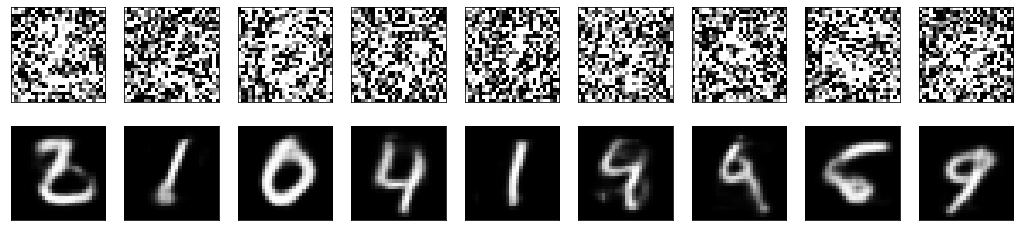

In [0]:

decoded_imgs = autoencoder.predict(x_test_noisy) 

# Plot figures to show what the noisy digits look like

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dense Denoising Autoencoder

In [0]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# CHANGE DONE : changed to float 32
x_train_noisy_flat = x_train_noisy.astype(np.float32)
x_test_noisy_flat = x_test_noisy.astype(np.float32)
x_test_noisy_flat.shape

(10000, 28, 28, 1)

In [0]:
x_train_noisy_flat = np.reshape(x_train_noisy_flat, (x_train_noisy_flat.shape[0], 784))
x_test_noisy_flat = np.reshape(x_test_noisy_flat, (x_test_noisy_flat.shape[0], 784))
x_test_noisy_flat.shape

(10000, 784)

In [0]:
input_img = tf.keras.layers.Input(shape=(784))

x = tf.keras.layers.Dense(512, activation='relu')(input_img)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(x)

model = tf.keras.models.Model(input_img, decoded)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss=tf.keras.losses.MSE)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# This will train for 100 epochs
model.fit(x_train_noisy_flat, x_train, epochs=100, batch_size=256, 
                shuffle=True, validation_data=(x_test_noisy_flat, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/DenoiseDense', histogram_freq=0, write_graph=False)])

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0850 - val_loss: 0.0677
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0640 - val_loss: 0.0591
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0569 - val_loss: 0.0537
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0518 - val_loss: 0.0502
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0489 - val_loss: 0.0477
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0470 - val_loss: 0.0462
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0456 - val_loss: 0.0450
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0442 - val_loss: 0.0436
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0431 - val_loss: 0.0427
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0421 - val_lo

In [0]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./tmp/DenoiseDense

Use above code to create graph shown

training loss (Orange) = 0.0246
, validation loss (blue) = 0.0353
![alt text](https://drive.google.com/uc?id=1dgUUvm_KNa2qWwAzIhf4BqaHAyog7AE1)

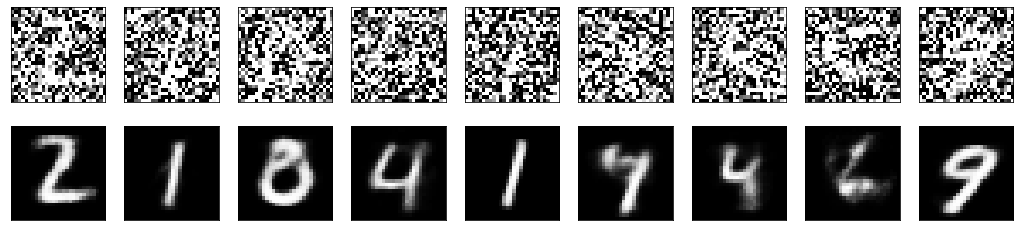

In [0]:
decoded_imgs = model.predict(x_test_noisy_flat) 
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Denoising Results 

For this Denoising application, autoencoder to learn an input from a corrupted version of itself to remove noise from an image. Both Dense network and CNN are not reporting big error and satisfactory images are produced by both networks.
By looking at the graph we can see there is difference between training and validtion loss which could be happening because of overfitting.

CNN are considered better for big size of image processing, the size of our input image here is not big so both networks are giving comparable performance.

# Task 3 Text Reconstruction

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
np.random.seed(111)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
   


Using TensorFlow backend.


## Importing Data for task 3 from drive and creating train and test set

**Instructions**:

* Place the zipped files (train.zip, train_cleaned.zip, and test.zip) in a folder and upload the folder to your Google Drive.
* Alter the path variables and run the code cells below to successfully connect to your Google Drive in order to extract the data.
* To do so, you'll be required to paste your Authentication Code here as well.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
fid_tr = drive.ListFile({'q':"title='train.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid_tr})
f.GetContentFile('train.zip')

fid_ts = drive.ListFile({'q':"title='test.zip'"}).GetList()[0]['id']
f1 = drive.CreateFile({'id': fid_ts})
f1.GetContentFile('test.zip')

fid_cl = drive.ListFile({'q':"title='train_cleaned.zip'"}).GetList()[0]['id']
f2 = drive.CreateFile({'id': fid_cl})
f2.GetContentFile('train_cleaned.zip')

!unzip train.zip
!unzip test.zip
!unzip train_cleaned.zip

import os
PATH1 = '/content/'
PATH2 = '/content/'
PATH3 = '/content/'
os.listdir(PATH1)
os.listdir(PATH2)
os.listdir(PATH3)

train_dir = os.path.join(PATH1, 'train')
test_dir = os.path.join(PATH2, 'test')
train_cleaned_dir = os.path.join(PATH3, 'train_cleaned')

Archive:  train.zip
   creating: train/
  inflating: train/101.png           
  inflating: train/102.png           
  inflating: train/104.png           
  inflating: train/105.png           
 extracting: train/107.png           
 extracting: train/108.png           
 extracting: train/11.png            
  inflating: train/110.png           
 extracting: train/111.png           
  inflating: train/113.png           
  inflating: train/114.png           
 extracting: train/116.png           
  inflating: train/117.png           
 extracting: train/119.png           
 extracting: train/12.png            
 extracting: train/120.png           
  inflating: train/122.png           
 extracting: train/123.png           
  inflating: train/125.png           
  inflating: train/126.png           
  inflating: train/128.png           
  inflating: train/129.png           
  inflating: train/131.png           
 extracting: train/132.png           
 extracting: train/134.png           
 extractin

In [0]:
X = []
Y = []
images = os.listdir(train_dir)

clean_images = os.listdir(train_cleaned_dir)

for img in images:
    img = load_img(train_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in clean_images:
    img = load_img(train_cleaned_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

x_test =[]

test_images = os.listdir(test_dir)

for img in test_images:
    img = load_img(test_dir + "/" + img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    x_test.append(img)

x_test = np.array(x_test)

X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


## Dense Architecture

For Dense architecture, Image is flattened to 226800 and given as input for 3-layer dense encoder and decoder architecture with relu activation function in hidden layers and sigmoid at the output layer. Dense architcture is reporting validation root mean square error of 0.1572 after 100 epochs.

In [0]:
# CHANGE DONE : changed to float 64
# X_train, X_valid, y_train, y_valid, x_test

x_train = X_train.astype(np.float64)
x_train_flat = np.reshape(x_train, (x_train.shape[0], 226800))

x_valid = X_valid.astype(np.float64)
x_valid_flat = np.reshape(x_valid, (x_valid.shape[0], 226800))

y_train = y_train.astype(np.float64)
y_train_flat = np.reshape(y_train, (y_train.shape[0], 226800))

y_valid = y_valid.astype(np.float64)
y_valid_flat = np.reshape(y_valid, (y_valid.shape[0], 226800))

x_test = x_test.astype(np.float64)
x_test_flat = np.reshape(x_test, (x_test.shape[0], 226800))

In [0]:
input_img = tf.keras.layers.Input(shape=(226800))

x = tf.keras.layers.Dense(32, activation='relu')(input_img)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
decoded = tf.keras.layers.Dense(226800, activation='sigmoid')(x)

model = tf.keras.models.Model(input_img, decoded)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 226800)]          0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                7257632   
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056

In [0]:
# This will train for 100 epochs
model.fit(x_train_flat, y_train_flat, epochs=100, batch_size=2, 
                shuffle=True, validation_data=(x_valid_flat, y_valid_flat), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/task3ANN', histogram_freq=0, write_graph=False)])


Epoch 1/100
65/65 [==============================] - 1s 13ms/step - loss: 0.1195 - root_mean_squared_error: 0.3464 - val_loss: 0.0636 - val_root_mean_squared_error: 0.2513
Epoch 2/100
65/65 [==============================] - 1s 10ms/step - loss: 0.0667 - root_mean_squared_error: 0.2582 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2487
Epoch 3/100
65/65 [==============================] - 1s 10ms/step - loss: 0.0663 - root_mean_squared_error: 0.2576 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2493
Epoch 4/100
65/65 [==============================] - 1s 11ms/step - loss: 0.0663 - root_mean_squared_error: 0.2575 - val_loss: 0.0632 - val_root_mean_squared_error: 0.2513
Epoch 5/100
65/65 [==============================] - 1s 11ms/step - loss: 0.0663 - root_mean_squared_error: 0.2576 - val_loss: 0.0618 - val_root_mean_squared_error: 0.2478
Epoch 6/100
65/65 [==============================] - 1s 10ms/step - loss: 0.0662 - root_mean_squared_error: 0.2571 - val_loss: 0.0619 - val_

In [0]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./tmp/task3ANN

Use above code to create graph shown

root_mean_squared_error (Orange) = 0.1206
, val root_mean_squared_error (blue) = 0.1572
![alt text](https://drive.google.com/uc?id=1zgL-ENnxg5yLOUeDrMO1XsQ0yPNWdDMx)


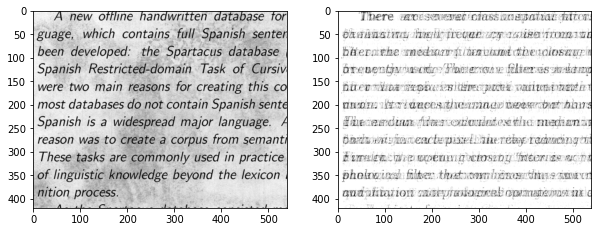

In [0]:
# Compute the prediction
predicted_label = np.squeeze(model.predict(x_test_flat))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(x_test_flat[0].reshape(420,540)), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[0].reshape(420,540)), cmap='gray')
plt.show()

## CNN Basic Model

This is the basic three conv2D layered CNN with activation function relu in conv2D layers and sigmoid at the output. This architecture is giving validation RMSE of 0.1163 and training RMSE of 0.1124 after 100 epochs using Adam optimizer at 0.0001 learning rate.

In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3) ,activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
print(encoded.shape)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
autoencoder.summary()

(None, 105, 135, 32)
(None, 420, 540, 1)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 420, 540, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 210, 270, 32)      18464     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 210, 270, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 105, 135, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)

In [0]:
# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/task3basicCNN', histogram_freq=0, write_graph=False)])


Epoch 1/100
17/17 [==============================] - 2s 122ms/step - loss: 0.2107 - root_mean_squared_error: 0.4596 - val_loss: 0.1882 - val_root_mean_squared_error: 0.4339
Epoch 2/100
17/17 [==============================] - 1s 85ms/step - loss: 0.1492 - root_mean_squared_error: 0.3902 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2994
Epoch 3/100
17/17 [==============================] - 1s 85ms/step - loss: 0.0775 - root_mean_squared_error: 0.2786 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2651
Epoch 4/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0756 - root_mean_squared_error: 0.2751 - val_loss: 0.0681 - val_root_mean_squared_error: 0.2609
Epoch 5/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0719 - root_mean_squared_error: 0.2692 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2579
Epoch 6/100
17/17 [==============================] - 2s 99ms/step - loss: 0.0708 - root_mean_squared_error: 0.2659 - val_loss: 0.0646 - val

In [0]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./tmp/task3basicCNN

Use above code to create graph shown

root_mean_squared_error (Orange) = 0.1124
, val root_mean_squared_error (blue) = 0.1163

![alt text](https://drive.google.com/uc?id=15sI_X2iHu0m9meOR3DOK8OLStpfHGo1E)

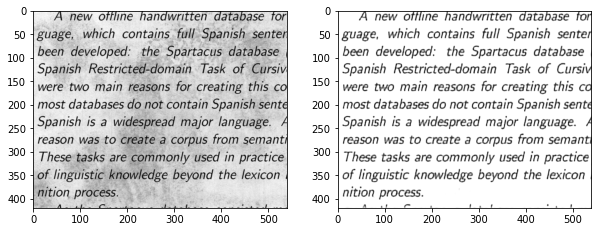

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(x_test))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(x_test[0]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('float64')[0]), cmap='gray')
plt.show()


## CNN complex models 1

1st complex CNN model with Conv2D, BatchNormalization & Dense layers resulting in validation RMSE of 0.0824 and training RMSE of 0.0073 after 100 epochs using Adam optimizer at 0.0001 learning rate.

In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1))

x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3) ,activation=tf.nn.relu, padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
print(encoded.shape)

x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(encoded)
x = tf.keras.layers.BatchNormalization()(encoded)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
autoencoder.summary()

autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/task3CNNComplex1', histogram_freq=0, write_graph=False)])


(None, 105, 135, 64)
(None, 420, 540, 1)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 420, 540, 128)     1280      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 210, 270, 128)     0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 210, 270, 128)     512       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 210, 270, 64)      73792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 210, 270, 64)      256       
_________________________________________________________________
conv2d_47 (Conv2D

In [0]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./tmp/task3CNNComplex1

Use above code to create the graph shown

root_mean_squared_error (Orange) = 0.1124
, val root_mean_squared_error (blue) = 0.1163

![alt text](https://drive.google.com/uc?id=1mdqW8B2iCKRsENz_G3zoZbSCedh0e3AS)


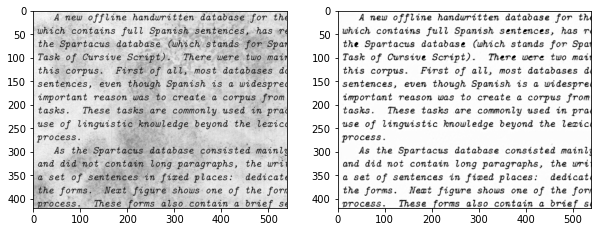

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(x_test))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(x_test[5]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('float64')[5]), cmap='gray')
plt.show()

## CNN complex models 2

Final complex CNN model is defined with removing a Maxpooling2D layer and adding Dropout layer at rate = 0.1, changing the activation functions to leaky relu. Adaptive learning rate is used in Adam optimizer with learning rate starting from 0.01 and going up to 0.00001.

Resulting **training RMSE of 0.0398 and validation RMSE of 0.0327**

In [0]:
input_img = tf.keras.layers.Input(shape=(420, 540, 1))

x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(rate=0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3) ,activation=tf.nn.leaky_relu, padding='same')(x)
encoded = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(x)
print(encoded.shape)

x = tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu)(encoded)
x = tf.keras.layers.BatchNormalization()(encoded)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print(decoded.shape)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
autoencoder.summary()
callback = ReduceLROnPlateau(monitor = 'val_loss', patience = 8, verbose = 1,
                              mode = 'auto', factor = 0.1, min_lr = 0.00001)


(None, 210, 270, 64)
(None, 420, 540, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 420, 540, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 210, 270, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 210, 270, 128)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 210, 270, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 270, 64)      73792     
_________________________________________________________________
batch_normalization_

In [0]:
autoencoder.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_valid, y_valid), 
                callbacks=[callback, tf.keras.callbacks.TensorBoard(log_dir='./tmp/task3CNNComplex2')])

Epoch 1/100
33/33 [==============================] - 6s 168ms/step - loss: 0.1015 - root_mean_squared_error: 0.3207 - val_loss: 0.0844 - val_root_mean_squared_error: 0.2913 - lr: 0.0100
Epoch 2/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0377 - root_mean_squared_error: 0.1945 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2912 - lr: 0.0100
Epoch 3/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0244 - root_mean_squared_error: 0.1564 - val_loss: 0.0693 - val_root_mean_squared_error: 0.2639 - lr: 0.0100
Epoch 4/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0162 - root_mean_squared_error: 0.1266 - val_loss: 0.0757 - val_root_mean_squared_error: 0.2759 - lr: 0.0100
Epoch 5/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2340 - lr: 0.0100
Epoch 6/100
33/33 [==============================] - 5s 137ms/step - l

In [0]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./tmp/task3CNNComplex2

Use above code to create the graph shown

root_mean_squared_error (Orange) = 0.0398
, val root_mean_squared_error (blue) = 0.0327

![alt text](https://drive.google.com/uc?id=1pdxWr1NBaSydydzyRcNpZGxpSiXtgfSO)

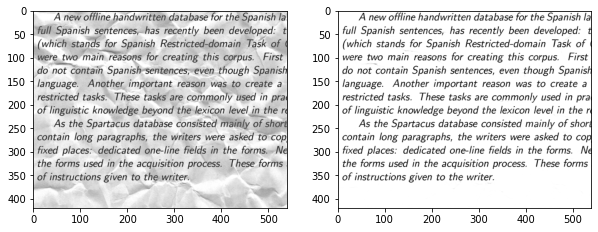

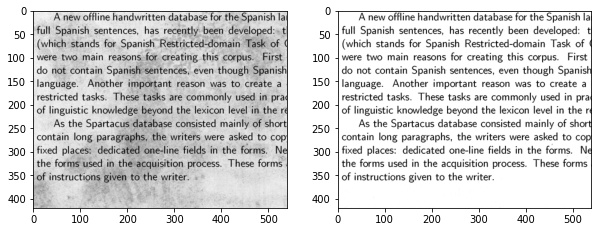

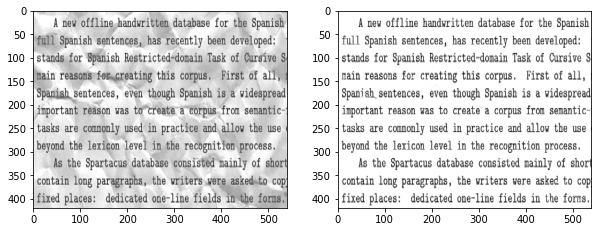

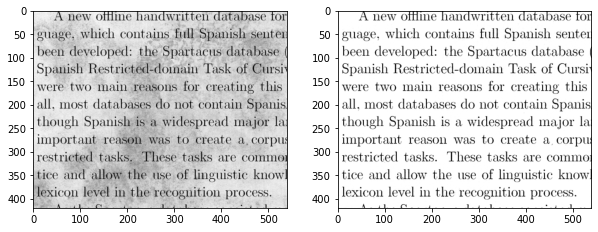

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(x_test[1:10]))
for i in range(4):
    f, ax = plt.subplots(1,2, figsize=(10,8))
    ax[0].imshow(np.squeeze(x_test[i+1]), cmap='gray')
    ax[1].imshow(np.squeeze(predicted_label[i]), cmap='gray')
plt.show()

## Results and Discussion

we have made four models for Text Reconstruction Application out of them Dense, multi-layer model is producing highest validation RMSE 0.1572 making it the worst model among all. while processing images CNN store the important feature of the input images and reduce the images but Dense model takes all values flattened and process the less important features as well making Dense multi-layer model not suitable for this application.


CNN complex model 1 is using BatchNormalization and dense layers. BatchNormalization gives the normalized output which can be fed to consecutive layer which increases the training spread and normalize activation. A Dense layer of 64 neurons is added in the model as compared to basic CNN. These changes are reducing the validation RMSE to 0.0853.


CNN Complex model 2 MaxPooling layer reduces the amount of information in an image thus removing them gives us a better chance of arriving at more detailed features as compared to what we would have achieved before. As we have removed MaxPooling layer the number of features has increased due to consecutive presence of filter in the two Conv2D layers therefore to prevent overfitting a dropout layer is added which kill 0.1 percent of the activations randomly.
The relu activations have been tweaked to adapt a more robust implementation known as leaky relu which includes a negative slope thus it does not kill negative activations and might perform better than the conventional case in which relu activations have been used the slope can be changed as desired which gives us more control.


## Conclusion

Below Table shows the training and validation RMSE for different models.

|Model | Training RMSE | Validation RMSE|
|-----|------|-----|
|Dense Multi-layer|0.1206|0.1572|
|CNN Basic|0.1124|0.1163|
|CNN Complex 1|0.0824|0.0853|
|CNN Complex 2|0.0398|0.0327|

From the validation RMSE and also by looking at clarity of images produced by different model we can conclude that CNN complex model best among all of these.



# Reference

https://www.tensorflow.org/tutorials/keras/classification
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb